## DSGA 1001 - Tree Analysis (Classification)
### December 16, 2022
Code by: Leo Chen and Xinyue Ma


In [2]:
# import libs
import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [3]:
# seed the random number generator
np.random.seed(18962882)
rng = np.random.default_rng(18962882)
rs = 18962882

In [4]:
# load subset data
sub = pd.read_pickle('sub')
sub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426190 entries, 1 to 683783
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   health      426190 non-null  int32  
 1   tree_dbh    426190 non-null  int64  
 2   Latitude    426190 non-null  float64
 3   curb_loc    426190 non-null  object 
 4   spc_common  426190 non-null  object 
 5   guards      426190 non-null  object 
 6   user_type   426190 non-null  object 
 7   root_stone  426190 non-null  object 
 8   root_other  426190 non-null  object 
 9   trnk_wire   426190 non-null  object 
 10  trnk_other  426190 non-null  object 
 11  brnch_ligh  426190 non-null  object 
 12  brnch_othe  426190 non-null  object 
 13  boroname    426190 non-null  object 
dtypes: float64(1), int32(1), int64(1), object(11)
memory usage: 47.1+ MB


In [5]:
sub.head()

,health,tree_dbh,Latitude,curb_loc,spc_common,guards,user_type,root_stone,root_other,trnk_wire,trnk_other,brnch_ligh,brnch_othe,boroname
1,0,21,40.794111,OnCurb,pin oak,None,TreesCount Staff,Yes,No,No,No,No,No,Queens
2,1,3,40.717581,OnCurb,honeylocust,None,Volunteer,No,No,No,No,No,No,Brooklyn
3,1,10,40.713537,OnCurb,honeylocust,None,Volunteer,Yes,No,No,No,No,No,Brooklyn
5,1,11,40.770046,OnCurb,honeylocust,Helpful,Volunteer,No,No,No,No,No,No,Manhattan
6,1,11,40.770210,OnCurb,honeylocust,Helpful,Volunteer,No,No,No,No,No,No,Manhattan


In [6]:
# summarize top 10 species
sub['spc_common'].value_counts()

London planetree     87012
honeylocust          64258
Callery pear         58924
pin oak              53179
Norway maple         34189
littleleaf linden    29742
cherry               29271
Japanese zelkova     29258
ginkgo               21019
Sophora              19338
Name: spc_common, dtype: int64

In [10]:
# subset each species into a data frame
df_list = []
   
for i in range(10):
    df = sub[sub['spc_common'] == sub['spc_common'].value_counts().index[i]]
    df_list.append(df)

In [11]:
# check
df_list[9].shape

(19338, 14)

### Find best model  (Random Forest) for each spicies

In [14]:
# containers
best_params = []
best_estimators = []
best_scores = []
fp_rates = []
tp_rates = []
f1_scores = []
auc_scores = []
con_matrices = []
fea_importances = []

# param grid
params = {'criterion': ['entropy', 'gini'],
          'n_estimators': np.arange(100, 401, 100),
          'max_depth': np.arange(3, 7, 1),
          'min_samples_leaf':np.linspace(0.02, 0.1, 5),
          'max_features': np.arange(2, 5)}
params

{'criterion': ['entropy', 'gini'],
 'n_estimators': array([100, 200, 300, 400]),
 'max_depth': array([3, 4, 5, 6]),
 'min_samples_leaf': array([0.02, 0.04, 0.06, 0.08, 0.1 ]),
 'max_features': array([2, 3, 4])}


>>>>>>>>>> Starting Model  0  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.4572651571856287
[[    0  2741]
 [    0 14662]]
test f1: 0.45725869327927643
test auc: 0.6800347845413253


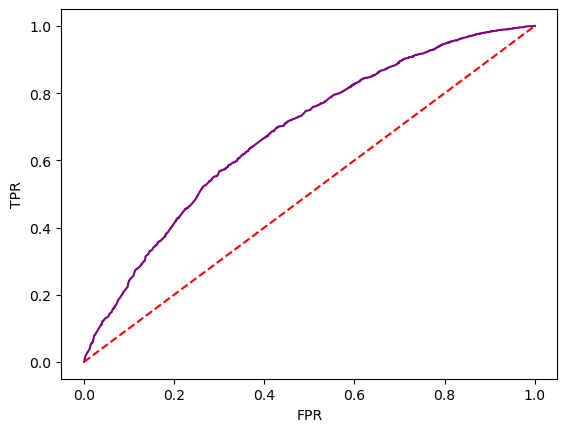

tree_dbh                      0.224900
user_type_Volunteer           0.157050
trnk_other_Yes                0.132218
boroname_Manhattan            0.113590
Latitude                      0.075707
guards_None                   0.070609
brnch_othe_Yes                0.051923
guards_Helpful                0.042341
boroname_Staten Island        0.030820
boroname_Queens               0.026765
root_other_Yes                0.021679
user_type_TreesCount Staff    0.021488
root_stone_Yes                0.017996
brnch_ligh_Yes                0.007131
boroname_Brooklyn             0.004542
curb_loc_OnCurb               0.001239
trnk_wire_Yes                 0.000000
guards_Unsure                 0.000000
dtype: float64

>>>>>>>>>> Starting Model  1  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.4589069933624314
[[    0  1952]
 [    0 10900]]
test f1: 0.4589087234759178
test auc: 0.6438245

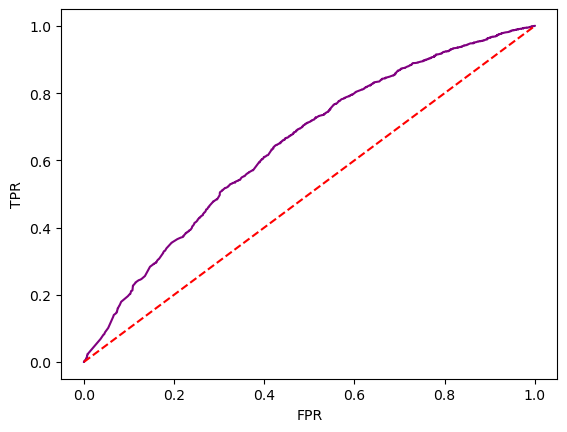

brnch_othe_Yes                0.190654
trnk_other_Yes                0.157791
tree_dbh                      0.136950
Latitude                      0.126554
root_other_Yes                0.107427
root_stone_Yes                0.093812
user_type_Volunteer           0.037384
brnch_ligh_Yes                0.032549
curb_loc_OnCurb               0.030469
boroname_Manhattan            0.027651
boroname_Brooklyn             0.015120
guards_Helpful                0.013970
guards_None                   0.011184
user_type_TreesCount Staff    0.010543
boroname_Queens               0.004963
boroname_Staten Island        0.002978
guards_Unsure                 0.000000
trnk_wire_Yes                 0.000000
dtype: float64

>>>>>>>>>> Starting Model  2  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.4492592764175492
[[   0 2172]
 [   0 9613]]
test f1: 0.44924759323301244
test auc: 0.6288348258

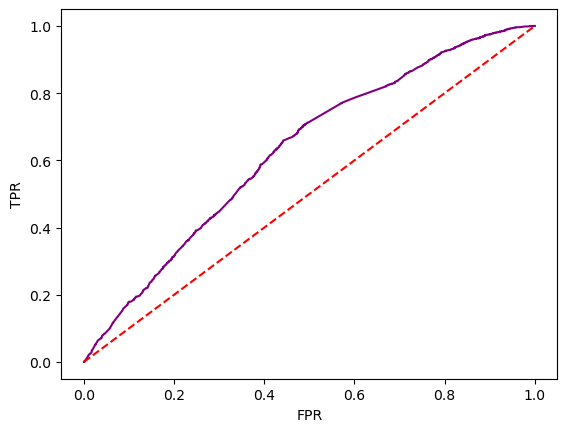

brnch_othe_Yes                0.156513
boroname_Manhattan            0.141305
trnk_other_Yes                0.130682
user_type_TreesCount Staff    0.123730
Latitude                      0.089627
tree_dbh                      0.085381
boroname_Brooklyn             0.065608
boroname_Staten Island        0.042561
brnch_ligh_Yes                0.042133
root_other_Yes                0.034156
boroname_Queens               0.029350
root_stone_Yes                0.026231
guards_None                   0.013977
user_type_Volunteer           0.010375
guards_Helpful                0.008372
trnk_wire_Yes                 0.000000
guards_Unsure                 0.000000
curb_loc_OnCurb               0.000000
dtype: float64

>>>>>>>>>> Starting Model  3  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.46137874262659495
[[   0 1525]
 [   0 9111]]
test f1: 0.46138653972755356
test auc: 0.659841553

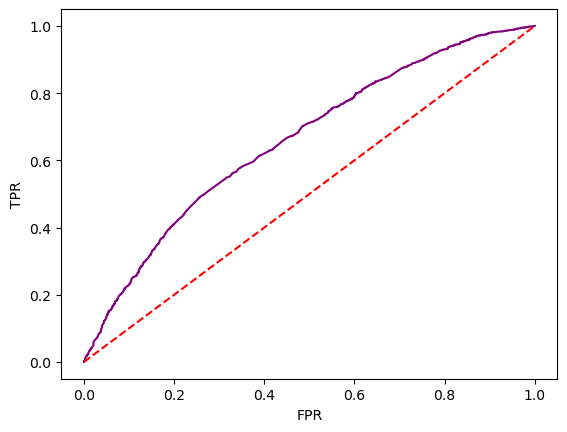

tree_dbh                      0.212859
brnch_othe_Yes                0.160208
trnk_other_Yes                0.152719
Latitude                      0.092193
root_other_Yes                0.073893
boroname_Manhattan            0.059238
brnch_ligh_Yes                0.052741
guards_Helpful                0.042433
curb_loc_OnCurb               0.031980
user_type_TreesCount Staff    0.029812
root_stone_Yes                0.024770
boroname_Queens               0.023398
user_type_Volunteer           0.020279
boroname_Staten Island        0.011035
guards_None                   0.007379
boroname_Brooklyn             0.005063
guards_Unsure                 0.000000
trnk_wire_Yes                 0.000000
dtype: float64

>>>>>>>>>> Starting Model  4  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 0.02, 'n_estimators': 200}
score: 0.5077028620704049
[[ 381 2207]
 [ 165 4085]]
test f1: 0.5090675072826873
test auc: 0.63893876716065

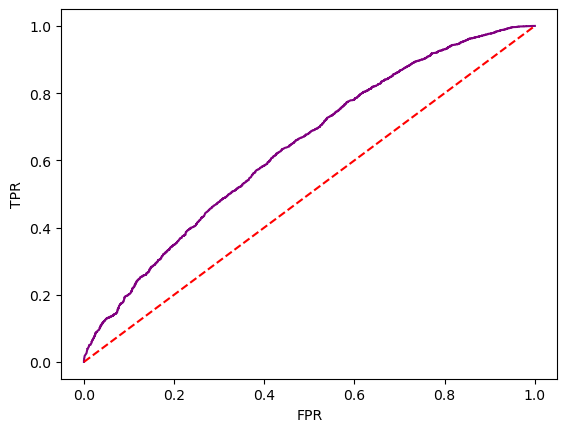

brnch_othe_Yes                0.222313
trnk_other_Yes                0.222235
Latitude                      0.120628
boroname_Staten Island        0.113125
boroname_Queens               0.095253
user_type_Volunteer           0.053028
brnch_ligh_Yes                0.051027
root_stone_Yes                0.030040
tree_dbh                      0.028303
boroname_Brooklyn             0.024683
user_type_TreesCount Staff    0.021186
root_other_Yes                0.017372
guards_None                   0.000808
trnk_wire_Yes                 0.000000
guards_Unsure                 0.000000
guards_Helpful                0.000000
boroname_Manhattan            0.000000
curb_loc_OnCurb               0.000000
dtype: float64

>>>>>>>>>> Starting Model  5  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.4422382665350044
[[   0 1232]
 [   0 4717]]
test f1: 0.4422463903994
test auc: 0.63845239586574

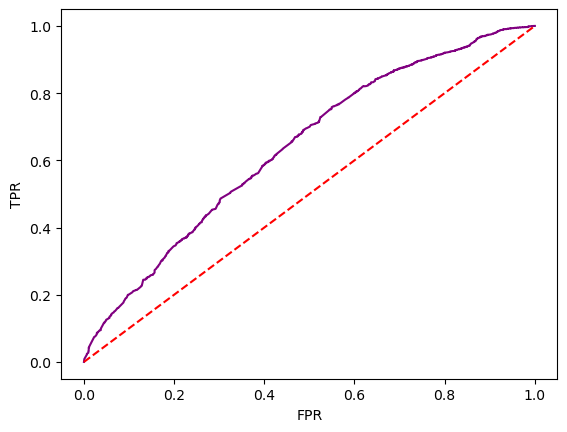

boroname_Manhattan            0.192378
trnk_other_Yes                0.136957
tree_dbh                      0.117906
boroname_Queens               0.093588
user_type_Volunteer           0.089955
brnch_othe_Yes                0.088591
Latitude                      0.075577
guards_None                   0.073010
user_type_TreesCount Staff    0.046665
root_other_Yes                0.038963
root_stone_Yes                0.017926
boroname_Brooklyn             0.013303
boroname_Staten Island        0.006666
guards_Helpful                0.005618
brnch_ligh_Yes                0.002895
trnk_wire_Yes                 0.000000
guards_Unsure                 0.000000
curb_loc_OnCurb               0.000000
dtype: float64

>>>>>>>>>> Starting Model  6  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.455821520362206
[[   0  951]
 [   0 4904]]
test f1: 0.4558044427920811
test auc: 0.598361195307

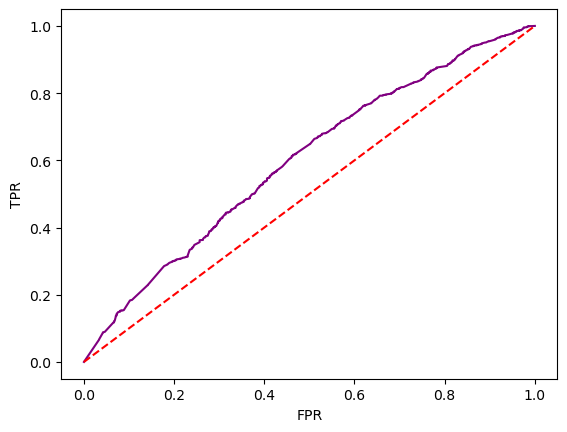

boroname_Queens               0.225310
tree_dbh                      0.180607
Latitude                      0.155243
user_type_Volunteer           0.103573
root_stone_Yes                0.077821
boroname_Staten Island        0.064646
boroname_Brooklyn             0.064112
user_type_TreesCount Staff    0.063987
brnch_ligh_Yes                0.023256
guards_None                   0.019622
guards_Helpful                0.013883
trnk_other_Yes                0.007939
guards_Unsure                 0.000000
trnk_wire_Yes                 0.000000
brnch_othe_Yes                0.000000
boroname_Manhattan            0.000000
curb_loc_OnCurb               0.000000
root_other_Yes                0.000000
dtype: float64

>>>>>>>>>> Starting Model  7  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.46358344353972464
[[   0  795]
 [   0 5057]]
test f1: 0.46356219635163626
test auc: 0.683369959

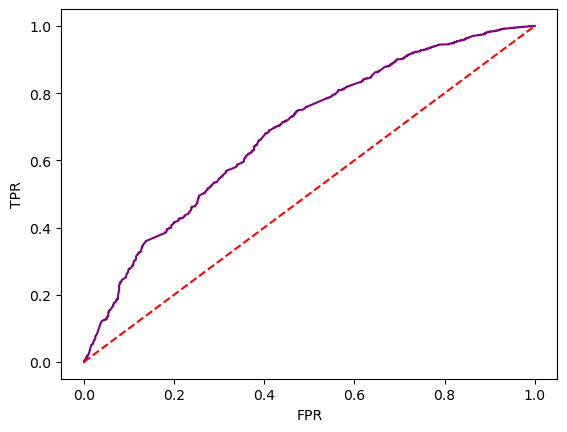

tree_dbh                      0.188399
trnk_other_Yes                0.144429
boroname_Manhattan            0.126418
boroname_Queens               0.118021
brnch_othe_Yes                0.108728
Latitude                      0.094870
root_other_Yes                0.061389
root_stone_Yes                0.045279
user_type_TreesCount Staff    0.033525
boroname_Brooklyn             0.027381
user_type_Volunteer           0.021215
guards_Helpful                0.015622
boroname_Staten Island        0.008561
guards_None                   0.004304
curb_loc_OnCurb               0.001106
brnch_ligh_Yes                0.000752
trnk_wire_Yes                 0.000000
guards_Unsure                 0.000000
dtype: float64

>>>>>>>>>> Starting Model  8  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.4489053475313212
[[   0  780]
 [   0 3424]]
test f1: 0.4488725747246985
test auc: 0.65257514827

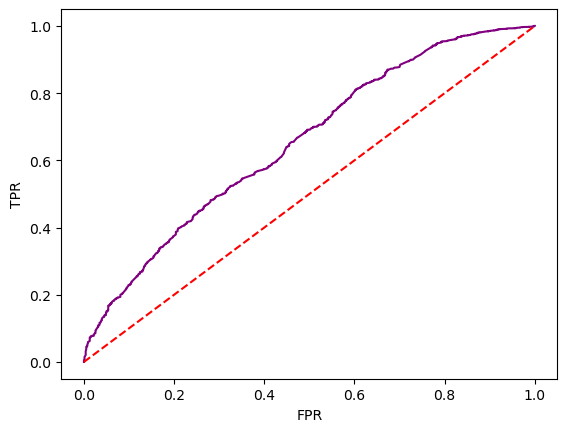

boroname_Manhattan            0.164813
trnk_other_Yes                0.157133
brnch_othe_Yes                0.147592
tree_dbh                      0.120840
Latitude                      0.116583
root_other_Yes                0.087415
boroname_Brooklyn             0.049156
root_stone_Yes                0.042541
user_type_TreesCount Staff    0.031178
guards_None                   0.029287
boroname_Queens               0.026173
user_type_Volunteer           0.014896
guards_Helpful                0.010096
brnch_ligh_Yes                0.001886
boroname_Staten Island        0.000414
guards_Unsure                 0.000000
trnk_wire_Yes                 0.000000
curb_loc_OnCurb               0.000000
dtype: float64

>>>>>>>>>> Starting Model  9  >>>>>>>>>>

Running Grid Search


param: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 0.02, 'n_estimators': 100}
score: 0.4501510568979839
[[   0  701]
 [   0 3167]]
test f1: 0.4501776830135039
test auc: 0.63677132266

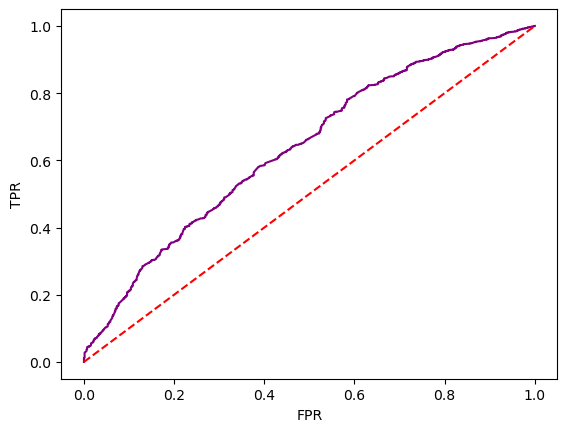

trnk_other_Yes                0.173198
brnch_othe_Yes                0.163960
Latitude                      0.149056
tree_dbh                      0.089651
user_type_TreesCount Staff    0.080530
curb_loc_OnCurb               0.066599
root_other_Yes                0.056351
guards_Helpful                0.054931
boroname_Brooklyn             0.051271
boroname_Manhattan            0.030009
boroname_Queens               0.026123
root_stone_Yes                0.020210
user_type_Volunteer           0.019230
boroname_Staten Island        0.012085
guards_None                   0.005883
brnch_ligh_Yes                0.000912
guards_Unsure                 0.000000
trnk_wire_Yes                 0.000000
dtype: float64


In [15]:
# loop through each species and tune a model for it
for i in range(10):
    # message
    print('\n>>>>>>>>>> Starting Model ', i, ' >>>>>>>>>>\n')
    
    # target 
    y = df_list[i]['health']
    # predictors
    X = df_list[i].drop(columns = ['health', 'spc_common'])
    X = pd.get_dummies(X, drop_first = True)
    
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = rs)
    
    # estimator
    rf = RandomForestClassifier(random_state = rs)
    
    # GS_cv
    print('Running Grid Search\n')
    rf_tun = GridSearchCV(
        estimator = rf, 
        param_grid = params, 
        cv = 3, 
        scoring = 'f1_macro', 
        n_jobs = -1)
    rf_tun.fit(X_train, y_train)
    
    # Collect
    print('Collecting Output\n')
    print('param:', rf_tun.best_params_)
    best_params.append(rf_tun.best_params_)
    best_estimators.append(rf_tun.best_estimator_)
    print('score:', rf_tun.best_score_)
    best_scores.append(rf_tun.best_score_)
    
    # test
    tuned_rf = rf_tun.best_estimator_
    
    # confusion matrix 
    y_pred = tuned_rf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    con_matrices.append(cm)
    
    # f1
    rf_tun_f1 = f1_score(y_test, y_pred, average='macro')
    print('test f1:', rf_tun_f1)
    f1_scores.append(rf_tun_f1)
    
    # auc
    y_pred_proba = tuned_rf.predict_proba(X_test)[:, 1]
    rf_tun_auc = roc_auc_score(y_test, y_pred_proba)
    print('test auc:', rf_tun_auc)
    auc_scores.append(rf_tun_auc)
    
    # ROC Curve 
    fpr, tpr, thresh = roc_curve(y_test, y_pred_proba)
    fp_rates.append(fpr)
    tp_rates.append(tpr)

    plt.plot(fpr, tpr, color="purple")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()
    
    # feature importance
    importance = pd.Series(tuned_rf.feature_importances_, index = X.columns)
    print(importance.sort_values(ascending = False))
    fea_importances.append(importance)

In [16]:
# look at all the optputs
pp = pprint.PrettyPrinter()

pp.pprint(best_params)
print()
pp.pprint(best_scores)
print()
pp.pprint(f1_scores)
print()
pp.pprint(auc_scores)
print()
pp.pprint(con_matrices)
print()
pp.pprint(fea_importances)
print()

[{'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  'min_samples_leaf': 0.02,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  'min_samples_leaf': 0.02,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  'min_samples_leaf': 0.02,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  'min_samples_leaf': 0.02,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 6,
  'max_features': 4,
  'min_samples_leaf': 0.02,
  'n_estimators': 200},
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  'min_samples_leaf': 0.02,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  'min_samples_leaf': 0.02,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  'min_samples_leaf': 0.02,
  'n_estimators': 100},
 {'criterion': 'entropy',
  'max_depth': 3,
  'max_features': 2,
  

 ### Feature Importances

In [17]:
top10_names = sub['spc_common'].value_counts().to_frame().T.columns 
top10_names

Index(['London planetree', 'honeylocust', 'Callery pear', 'pin oak',
       'Norway maple', 'littleleaf linden', 'cherry', 'Japanese zelkova',
       'ginkgo', 'Sophora'],
      dtype='object')

In [19]:
imp = pd.DataFrame(fea_importances)
imp.index = top10_names
imp

,tree_dbh,Latitude,curb_loc_OnCurb,guards_Helpful,guards_None,guards_Unsure,user_type_TreesCount Staff,user_type_Volunteer,root_stone_Yes,root_other_Yes,trnk_wire_Yes,trnk_other_Yes,brnch_ligh_Yes,brnch_othe_Yes,boroname_Brooklyn,boroname_Manhattan,boroname_Queens,boroname_Staten Island
London planetree,0.224900,0.075707,0.001239,0.042341,0.070609,0.0,0.021488,0.157050,0.017996,0.021679,0.0,0.132218,0.007131,0.051923,0.004542,0.113590,0.026765,0.030820
honeylocust,0.136950,0.126554,0.030469,0.013970,0.011184,0.0,0.010543,0.037384,0.093812,0.107427,0.0,0.157791,0.032549,0.190654,0.015120,0.027651,0.004963,0.002978
Callery pear,0.085381,0.089627,0.000000,0.008372,0.013977,0.0,0.123730,0.010375,0.026231,0.034156,0.0,0.130682,0.042133,0.156513,0.065608,0.141305,0.029350,0.042561
pin oak,0.212859,0.092193,0.031980,0.042433,0.007379,0.0,0.029812,0.020279,0.024770,0.073893,0.0,0.152719,0.052741,0.160208,0.005063,0.059238,0.023398,0.011035
Norway maple,0.028303,0.120628,0.000000,0.000000,0.000808,0.0,0.021186,0.053028,0.030040,0.017372,0.0,0.222235,0.051027,0.222313,0.024683,0.000000,0.095253,0.113125
littleleaf linden,0.117906,0.075577,0.000000,0.005618,0.073010,0.0,0.046665,0.089955,0.017926,0.038963,0.0,0.136957,0.002895,0.088591,0.013303,0.192378,0.093588,0.006666
cherry,0.180607,0.155243,0.000000,0.013883,0.019622,0.0,0.063987,0.103573,0.077821,0.000000,0.0,0.007939,0.023256,0.000000,0.064112,0.000000,0.225310,0.064646
Japanese zelkova,0.188399,0.094870,0.001106,0.015622,0.004304,0.0,0.033525,0.021215,0.045279,0.061389,0.0,0.144429,0.000752,0.108728,0.027381,0.126418,0.118021,0.008561
ginkgo,0.120840,0.116583,0.000000,0.010096,0.029287,0.0,0.031178,0.014896,0.042541,0.087415,0.0,0.157133,0.001886,0.147592,0.049156,0.164813,0.026173,0.000414
Sophora,0.089651,0.149056,0.066599,0.054931,0.005883,0.0,0.080530,0.019230,0.020210,0.056351,0.0,0.173198,0.000912,0.163960,0.051271,0.030009,0.026123,0.012085


In [31]:
imp.mean().sort_values(ascending = False)

trnk_other_Yes                0.141530
tree_dbh                      0.138580
brnch_othe_Yes                0.129048
Latitude                      0.109604
boroname_Manhattan            0.085540
boroname_Queens               0.066894
user_type_Volunteer           0.052698
root_other_Yes                0.049865
user_type_TreesCount Staff    0.046265
root_stone_Yes                0.039663
boroname_Brooklyn             0.032024
boroname_Staten Island        0.029289
guards_None                   0.023606
brnch_ligh_Yes                0.021528
guards_Helpful                0.020727
curb_loc_OnCurb               0.013139
trnk_wire_Yes                 0.000000
guards_Unsure                 0.000000
dtype: float64

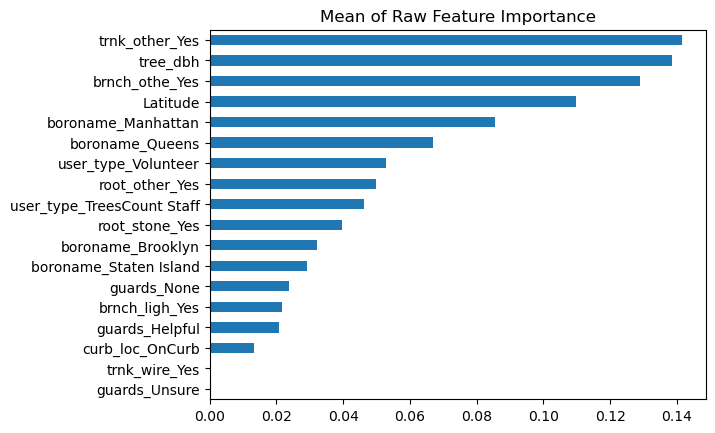

In [44]:
imp.mean().sort_values().plot.barh()
plt.title("Mean of Raw Feature Importance");

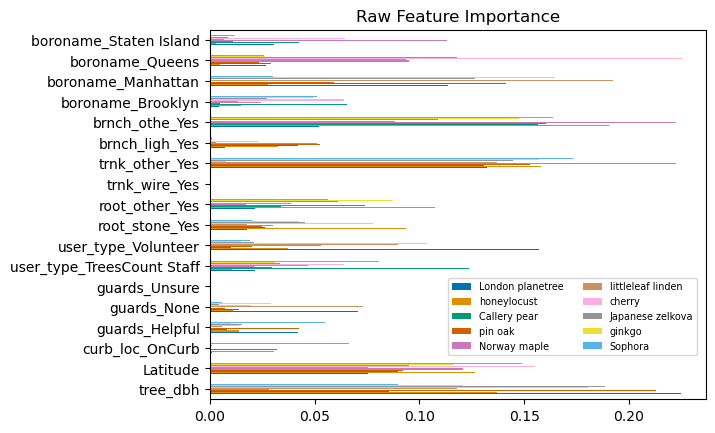

In [23]:
sns.set_palette('colorblind')

imp.T.plot(kind = 'barh')
plt.legend(loc = [0.48,0.12], ncol = 2, fontsize = 'x-small')
plt.title("Raw Feature Importance");

#plt.savefig('IMP', dpi = 200, bbox_inches = "tight")

In [57]:
imp_combined = imp.loc[:,['tree_dbh','Latitude','curb_loc_OnCurb', 'root_stone_Yes', 'root_other_Yes', 
                    'trnk_wire_Yes', 'trnk_other_Yes', 'brnch_ligh_Yes', 'brnch_othe_Yes']]
imp_combined.columns = ['tree_dbh','Latitude','curb_loc', 'root_stone', 'root_other', 'trnk_wire', 'trnk_other',
                        'brnch_ligh', 'brnch_othe']
imp_combined['guards'] = (imp['guards_Helpful'] + imp['guards_None'] + imp['guards_Unsure'])/3
imp_combined['user_type'] = (imp['user_type_TreesCount Staff'] + imp['user_type_Volunteer'])/2
imp_combined['boroname'] = (imp['boroname_Staten Island'] + imp['boroname_Queens'] + imp['boroname_Manhattan'] + imp['boroname_Brooklyn'])/4

imp_combined

,tree_dbh,Latitude,curb_loc,root_stone,root_other,trnk_wire,trnk_other,brnch_ligh,brnch_othe,guards,user_type,boroname
London planetree,0.224900,0.075707,0.001239,0.017996,0.021679,0.0,0.132218,0.007131,0.051923,0.037650,0.089269,0.043930
honeylocust,0.136950,0.126554,0.030469,0.093812,0.107427,0.0,0.157791,0.032549,0.190654,0.008385,0.023963,0.012678
Callery pear,0.085381,0.089627,0.000000,0.026231,0.034156,0.0,0.130682,0.042133,0.156513,0.007449,0.067052,0.069706
pin oak,0.212859,0.092193,0.031980,0.024770,0.073893,0.0,0.152719,0.052741,0.160208,0.016604,0.025045,0.024683
Norway maple,0.028303,0.120628,0.000000,0.030040,0.017372,0.0,0.222235,0.051027,0.222313,0.000269,0.037107,0.058265
littleleaf linden,0.117906,0.075577,0.000000,0.017926,0.038963,0.0,0.136957,0.002895,0.088591,0.026210,0.068310,0.076484
cherry,0.180607,0.155243,0.000000,0.077821,0.000000,0.0,0.007939,0.023256,0.000000,0.011168,0.083780,0.088517
Japanese zelkova,0.188399,0.094870,0.001106,0.045279,0.061389,0.0,0.144429,0.000752,0.108728,0.006642,0.027370,0.070095
ginkgo,0.120840,0.116583,0.000000,0.042541,0.087415,0.0,0.157133,0.001886,0.147592,0.013128,0.023037,0.060139
Sophora,0.089651,0.149056,0.066599,0.020210,0.056351,0.0,0.173198,0.000912,0.163960,0.020271,0.049880,0.029872


In [34]:
imp_combined.mean().sort_values(ascending = False)

trnk_other    0.141530
tree_dbh      0.138580
brnch_othe    0.129048
Latitude      0.109604
boroname      0.053437
root_other    0.049865
user_type     0.049481
root_stone    0.039663
brnch_ligh    0.021528
guards        0.014778
curb_loc      0.013139
trnk_wire     0.000000
dtype: float64

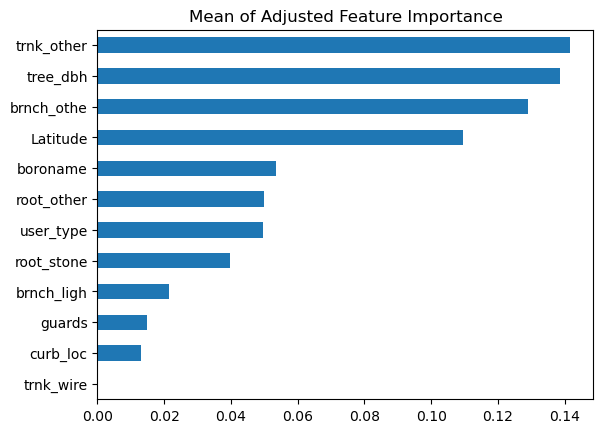

In [45]:
imp_combined.mean().sort_values().plot.barh()
plt.title("Mean of Adjusted Feature Importance");

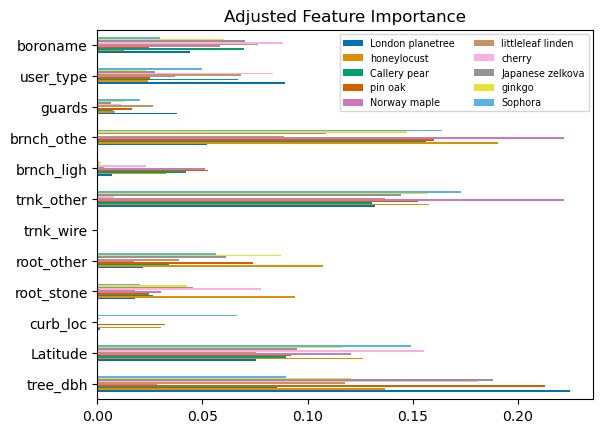

In [26]:
sns.set_palette('colorblind')

imp_combined.T.plot(kind = 'barh')
plt.legend(loc = 1, ncol = 2, fontsize = 'x-small')
plt.title("Adjusted Feature Importance");

#plt.savefig('IMP_adj', dpi = 200, bbox_inches = "tight")

### Hyperparameters and model performance

In [27]:
auc_scores

[0.6800347845413253,
 0.643824564784178,
 0.6288348258065974,
 0.6598415534455738,
 0.638938767160651,
 0.6384523958657412,
 0.5983611953074208,
 0.6833699598165816,
 0.6525751482746225,
 0.6367713226672889]

In [28]:
f1_scores

[0.45725869327927643,
 0.4589087234759178,
 0.44924759323301244,
 0.46138653972755356,
 0.5090675072826873,
 0.4422463903994,
 0.4558044427920811,
 0.46356219635163626,
 0.4488725747246985,
 0.4501776830135039]

In [29]:
hp = pd.DataFrame(best_params)
hp.index = top10_names
hp['F1'] = f1_scores
hp['AUC'] = auc_scores
hp

,criterion,max_depth,max_features,min_samples_leaf,n_estimators,F1,AUC
London planetree,entropy,3,2,0.02,100,0.457259,0.680035
honeylocust,entropy,3,2,0.02,100,0.458909,0.643825
Callery pear,entropy,3,2,0.02,100,0.449248,0.628835
pin oak,entropy,3,2,0.02,100,0.461387,0.659842
Norway maple,gini,6,4,0.02,200,0.509068,0.638939
littleleaf linden,entropy,3,2,0.02,100,0.442246,0.638452
cherry,entropy,3,2,0.02,100,0.455804,0.598361
Japanese zelkova,entropy,3,2,0.02,100,0.463562,0.683370
ginkgo,entropy,3,2,0.02,100,0.448873,0.652575
Sophora,entropy,3,2,0.02,100,0.450178,0.636771


### Models

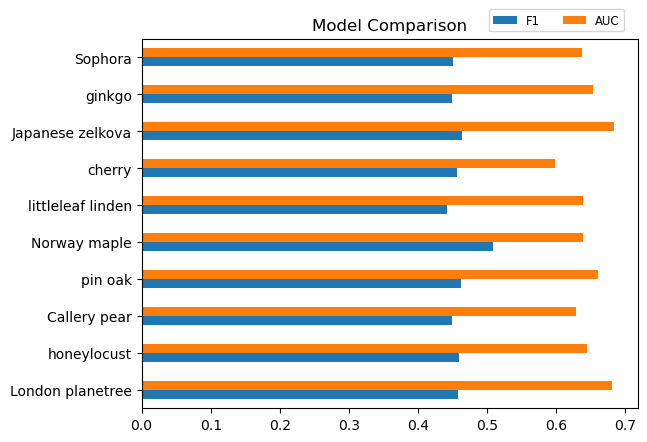

In [40]:
sns.set_palette('tab10')

hp.iloc[:, 5:].plot(kind = 'barh')
plt.title('Model Comparison')
plt.legend(loc = [0.70,1.02], fontsize = 'small', ncol = 2);

#plt.savefig('F1_AUC', dpi = 200, bbox_inches = "tight")

### ROC Curves

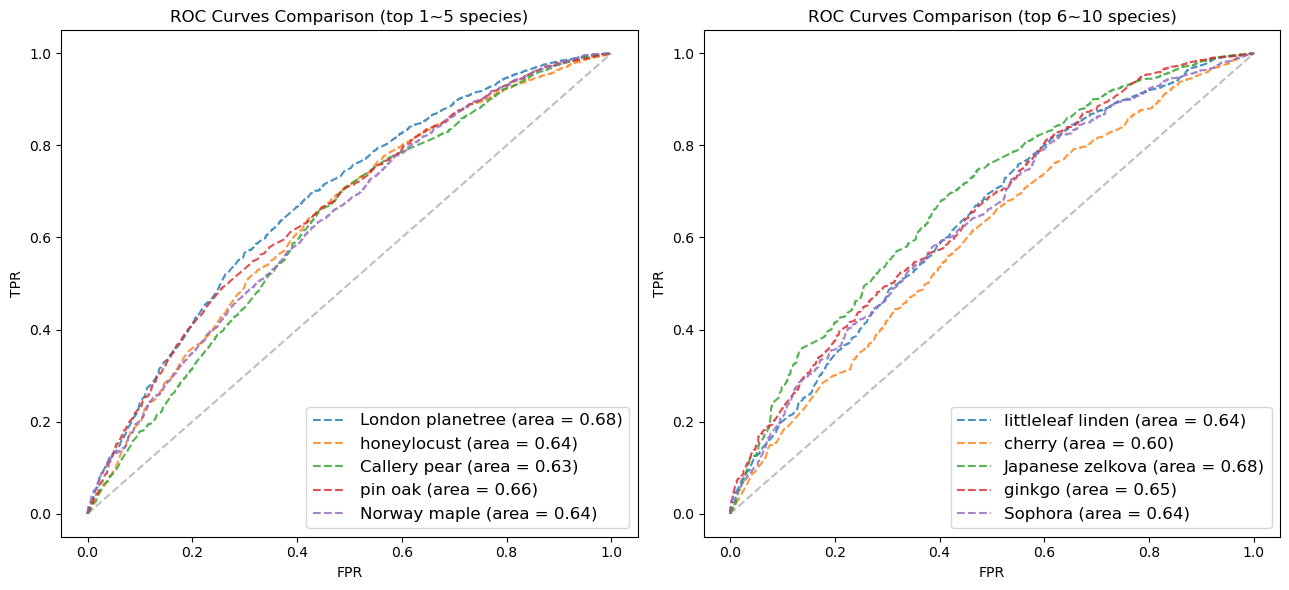

In [48]:
sns.set_palette('tab10')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (13, 6), tight_layout = True)

for i in range(0,5):
    ax[0].plot(fp_rates[i], tp_rates[i], '--', alpha = 0.8,
             label = f'{top10_names[i]} (area = {auc_scores[i]:.2f})') 
ax[0].plot([0, 1], [0, 1], '--', alpha = 0.5, color = 'gray')
ax[0].set(xlabel = "FPR", ylabel = "TPR", title = "ROC Curves Comparison (top 1~5 species)")
ax[0].legend(loc = 4, fontsize = 'large')


for i in range(5,10):
    ax[1].plot(fp_rates[i], tp_rates[i], '--', alpha = 0.8,
             label = f'{top10_names[i]} (area = {auc_scores[i]:.2f})')
ax[1].plot([0, 1], [0, 1], '--', alpha = 0.5, color = 'gray')
ax[1].set(xlabel = "FPR", ylabel = "TPR", title = "ROC Curves Comparison (top 6~10 species)")
ax[1].legend(loc = 4, fontsize = 'large')
;

#fig.savefig('ROC curve', dpi = 200)

### Confusion Matrix

In [38]:
con_matrices

[array([[    0,  2741],
        [    0, 14662]], dtype=int64),
 array([[    0,  1952],
        [    0, 10900]], dtype=int64),
 array([[   0, 2172],
        [   0, 9613]], dtype=int64),
 array([[   0, 1525],
        [   0, 9111]], dtype=int64),
 array([[ 381, 2207],
        [ 165, 4085]], dtype=int64),
 array([[   0, 1232],
        [   0, 4717]], dtype=int64),
 array([[   0,  951],
        [   0, 4904]], dtype=int64),
 array([[   0,  795],
        [   0, 5057]], dtype=int64),
 array([[   0,  780],
        [   0, 3424]], dtype=int64),
 array([[   0,  701],
        [   0, 3167]], dtype=int64)]

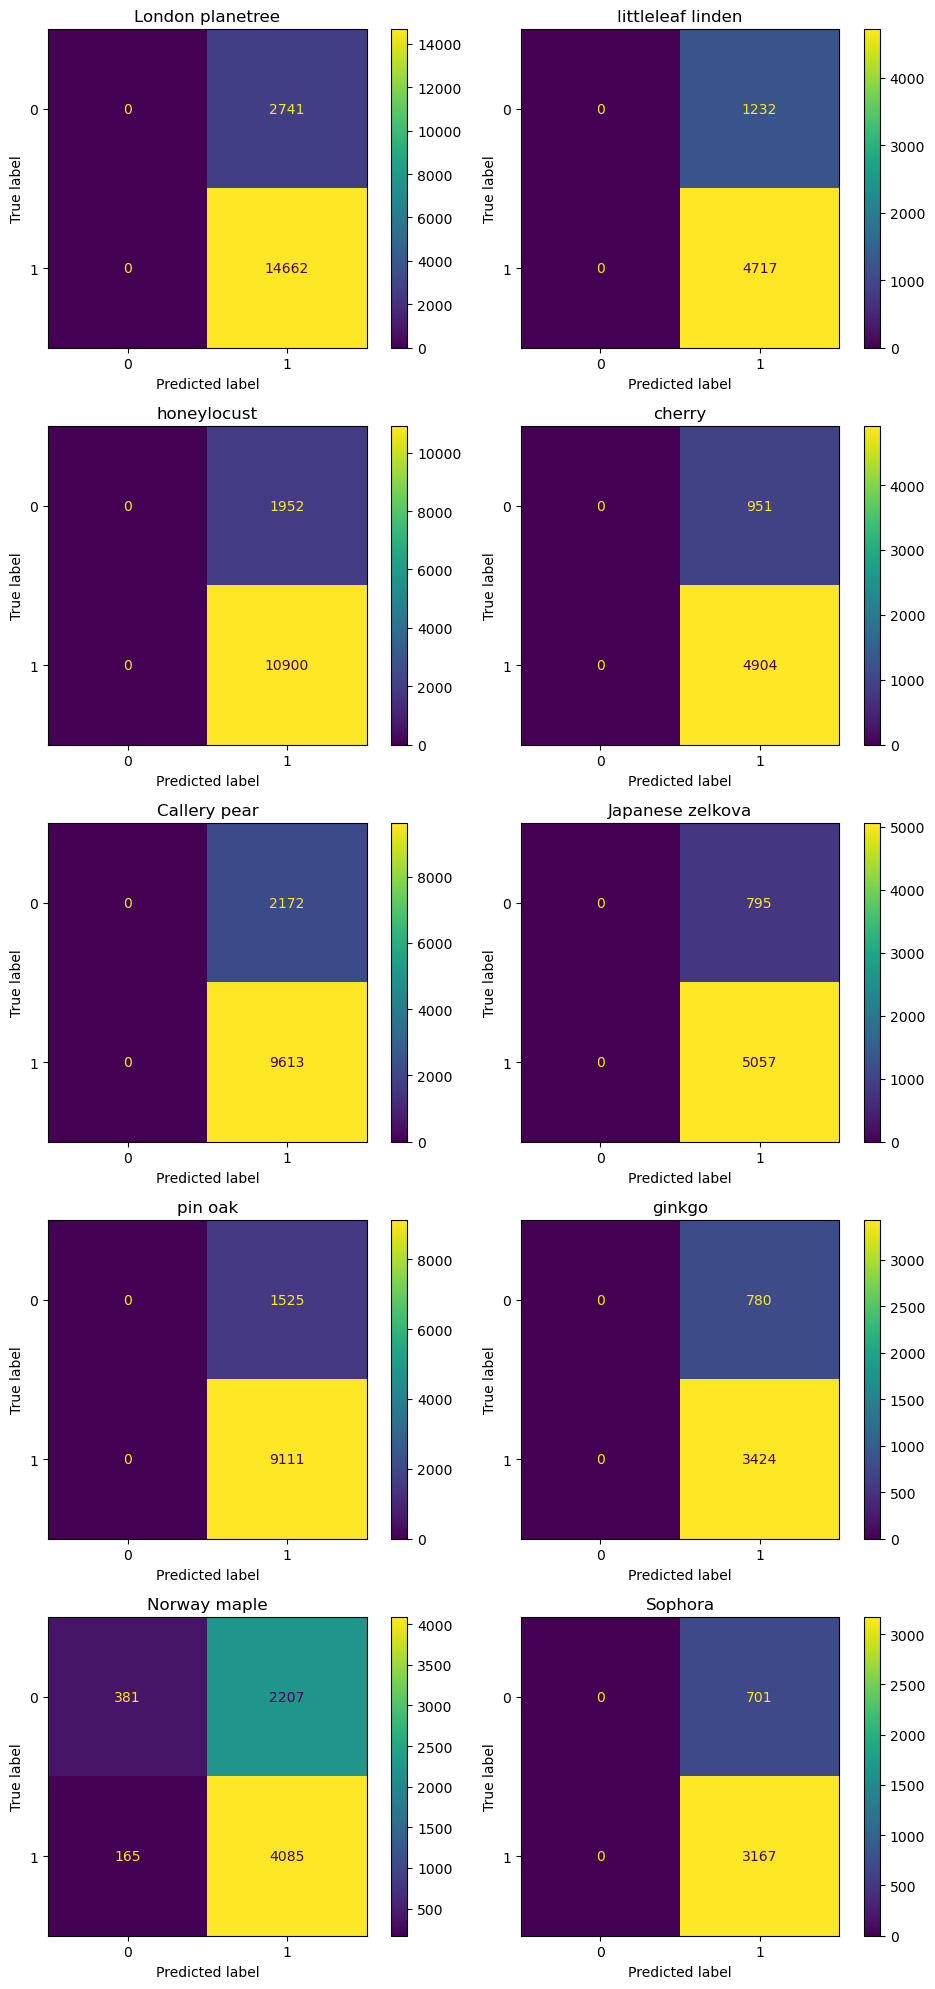

In [42]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (10,20), tight_layout = True)

ConfusionMatrixDisplay(con_matrices[0]).plot(ax = ax[0,0])
ax[0,0].set_title(top10_names[0])
ConfusionMatrixDisplay(con_matrices[1]).plot(ax = ax[1,0])
ax[1,0].set_title(top10_names[1])
ConfusionMatrixDisplay(con_matrices[2]).plot(ax = ax[2,0])
ax[2,0].set_title(top10_names[2])
ConfusionMatrixDisplay(con_matrices[3]).plot(ax = ax[3,0])
ax[3,0].set_title(top10_names[3])
ConfusionMatrixDisplay(con_matrices[4]).plot(ax = ax[4,0])
ax[4,0].set_title(top10_names[4])
ConfusionMatrixDisplay(con_matrices[5]).plot(ax = ax[0,1])
ax[0,1].set_title(top10_names[5])
ConfusionMatrixDisplay(con_matrices[6]).plot(ax = ax[1,1])
ax[1,1].set_title(top10_names[6])
ConfusionMatrixDisplay(con_matrices[7]).plot(ax = ax[2,1])
ax[2,1].set_title(top10_names[7])
ConfusionMatrixDisplay(con_matrices[8]).plot(ax = ax[3,1])
ax[3,1].set_title(top10_names[8])
ConfusionMatrixDisplay(con_matrices[9]).plot(ax = ax[4,1])
ax[4,1].set_title(top10_names[9])

plt.tight_layout();

#fig.savefig('ConMax', dpi = 200)